# Mishra Data Quality Index 2 (1-2-3.ipynb)
Zois Boukouvalas, Max Calzada 
November 10, 2022 (Latest Update)

'docs_for_lime_BERT_&_LIME_2.csv' must be manually inserted into the content folder each session.

## What does DQI c2 do?

DQI c2 measures the variance of frequency of words. The lesser the variance in frequency, the better.

1) DQI c2 find the frequencies of all words, no matter the part of speech, an a data set.

2) DQI c2 then categorizes words into

*   words (all words in general)
*   verbs
*   adjectives
*   nouns
*   adverbs

3) DQI c2 finds the frequencies of the different word types within their previously listed categories.

4) DQI c2 also measures the frequency of bigrams, trigrams, and sentences.

5) Finally, DQI c2 calculates a composite value using all the previously listed frequencies and variances of frequencies.  

### DQI c1

In [1]:
# Max: This code is unedited.

import pandas as pd
import numpy as np 
import json
import csv


import matplotlib.pyplot as plt # ? # not in DQI c1
import seaborn as sns # ? # not in DQI c1

from tqdm import tqdm_notebook as tqdm

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')

import spacy

from collections import Counter
from itertools import chain

from spacy.lang.en.examples import sentences 

import spacy.cli

spacy.cli.download("en_core_web_lg")
nlp = spacy.load("en_core_web_lg")

import math # ? # not in DQI c1

import string # ? # not in DQI c1
import sys # ? # not in DQI c1
import random # ? # not in DQI c1

# stop_words = set(stopwords.words('english'))
# lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [2]:
# Max: This code is edited and inserted.

df_sentences = pd.read_csv('docs_for_lime_BERT_&_LIME_2.csv')

In [3]:
# Max: This code is unedited.

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Max: This code is edited.

words=pd.DataFrame()
frames=[df_sentences['documents']] # frames=[df_wino['sentence1'],df_wino['sentence2']]
words['full'] = pd.concat(frames)
words.reset_index(inplace = True) 
words['casewords'] = words['full'].str.lower()
words['wsw'] = words['casewords'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
words['nopunc'] = words['wsw'].str.replace("'", "")
words['nopunc'] = words['nopunc'].str.replace(".", "")
words['nopunc'] = words['nopunc'].str.replace(",", "")
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
words['text_lemmatized'] = words.nopunc.apply(lemmatize_text)
words['final']="NaN"

def final(x):
    makeitastring = ' '.join(map(str, x))
    makeitastring=makeitastring.replace(",","")
    makeitastring=makeitastring.replace("'","")
    makeitastring=makeitastring.replace("[","")
    makeitastring=makeitastring.replace("]","")
    return makeitastring

for i in tqdm(range(len(words))):    
    column=['text_lemmatized']
    row=[i]
    words.loc[i,'final']=final(words.loc[i,'text_lemmatized'])

words['fullnopunc'] = words['full'].str.replace("'", "")
words['fullnopunc'] = words['fullnopunc'].str.replace(".", "")
words['fullnopunc'] = words['fullnopunc'].str.replace(",", "")
words['label']='NaN'

# Max: This code is unedited.

magwords=words.final.str.split(expand=True).stack().value_counts()
t1g=magwords.size/len(df_sentences)

# Max: This code is unedited.

g=[]
for i in range(len(words)):
    x=words.iloc[i]['fullnopunc']
    g.append(len(x.split()))
gstd=pd.Series(g).std()

# Max: This code is unedited.

nrg=len(words)
drg=0
for i in range(len(g)):
    xg=g[i]
    xg=(xg-3)*(30-xg) # Why are 3 and 30 the thresholds?
    if(xg>0):
        drg=drg+1
    else:
        drg=drg-1

<ipython-input-3-e57b57596367>:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  words['nopunc'] = words['nopunc'].str.replace(".", "")
<ipython-input-3-e57b57596367>:33: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(len(words))):


  0%|          | 0/86 [00:00<?, ?it/s]

<ipython-input-3-e57b57596367>:39: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  words['fullnopunc'] = words['fullnopunc'].str.replace(".", "")


In [4]:
t3g=drg/nrg
dqic1g=t1g+(gstd*t3g)

### DQI c2

In [5]:
# Max: This code is edited.

print("SENTENCE")


SENTENCE


In [6]:
gwords=words # =pd.read_csv("./test_good_101_1_words.csv"
df_traingood = words # = pd.read_csv("./test_good_101_1.csv")
# nlp = spacy.load("en_trf_bertbaseuncased_lg")

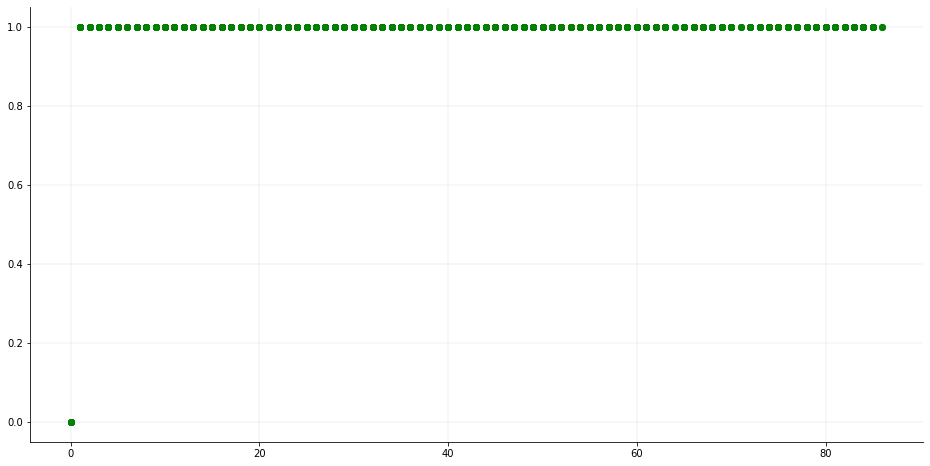

<Figure size 432x288 with 0 Axes>

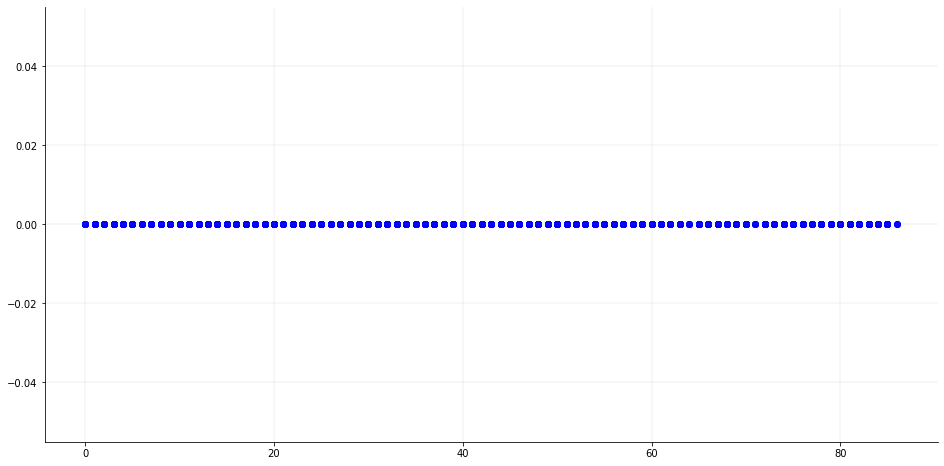

0.07056897321046963
0.0
0.0049799799799799815
0.0
1    1.0
Name: documents, dtype: float64
1/T1
0.0
T1
inf
86
86
T2
1.0
WORDS
2772
6.109918221371106e-06
1/T1
0.002471824876760307
T1
404.5594044310487
8426
8780
T2
0.9596810933940775
cl-20            0.020159
cocrystal        0.008656
energy           0.007745
method           0.007745
decomposition    0.007745
crystal          0.007517
dtype: float64


<ipython-input-7-2fb1ffe95152>:54: RuntimeWarning: divide by zero encountered in double_scalars
  print(1/sentencestd)


ADJ
1/T1
0.009924170886335215
T1
100.76408512643808
2505.0
1755.0
T2
0.7005988023952096
232    177.0
278     76.0
348     64.0
717     58.0
77      48.0
618     47.0
254     40.0
512     33.0
582     28.0
329     28.0
675     21.0
573     20.0
339     19.0
39      19.0
204     19.0
586     18.0
248     17.0
94      16.0
714     16.0
629     16.0
dtype: float64
832
ADV
1/T1
0.02350640224460881
T1
42.54160162809899
326.0
200.0
T2
0.6134969325153374
124    0.055215
12     0.055215
91     0.052147
41     0.030675
29     0.027607
9      0.027607
64     0.024540
65     0.024540
63     0.021472
14     0.021472
2      0.018405
27     0.018405
111    0.015337
78     0.015337
88     0.015337
92     0.015337
44     0.015337
100    0.012270
3      0.012270
59     0.012270
dtype: float64
VERB
1/T1
0.011177850496329137
T1
89.4626386645988
1139.0
423.0
T2
0.3713784021071115
195    0.040386
286    0.023705
132    0.022827
121    0.021071
282    0.019315
9      0.018437
82     0.017559
122    0.017559


<Figure size 432x288 with 0 Axes>

In [7]:
data = gwords['fullnopunc'].to_list() 
dff = pd.DataFrame(data,columns=['documents'])
dff = dff.dropna(thresh=1)
m1=[] # creates data frames
m2=[]
xx=[]

for i in range(1000):
    df=dff.sample(frac=random.random()) # ? Data frame, returns random numbers
    count = df['documents'].value_counts() # counts unique values
    x=count.value_counts(normalize=True) # normalizes
    x.sort_index() # sorts normalized values
    z=x.index
    y=[]
    for j in range(1,3):
        if j in z:
            y.append(x[j]) # append adds items to a list or vector
        else:
            y.append(0)       
    m1.append(y[0])
    m2.append(y[1])
    xx.append(len(count))
  
fig, ax = plt.subplots(figsize=(16,8)) # ignore plots for now
ax.scatter(xx,m1,c='green')
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()
plt.clf()
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(xx,m2,c='blue')
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()
plt.clf()

print(pd.Series(m1).std())
print(pd.Series(m2).std())
print(pd.Series(m1).var())
print(pd.Series(m2).var())

count = dff['documents'].value_counts() 
count.sort_values(ascending=False) # sort
print(count.value_counts(normalize=True)) # normalize

sentencestd=(count/len(count)).std() # counts words in a sentence, then takes std

print("1/T1")
print(sentencestd)
print("T1")
print(1/sentencestd)

nr=len(gwords)
dr=0
for i in range(len(count)):
    xdr=(2-count[i])
    if(xdr>0):
        dr=dr+count[i]
    else:
        dr=dr-count[i]
print(dr)
print(nr)
print("T2")
print(dr/nr)

#------------------------------------------------------
print("WORDS")
magwordsg=gwords.final.str.split(expand=True).stack().value_counts() # counts words
gnw=(magwordsg/len(magwordsg)) 
print(len(magwordsg))
print(gnw.var())
print("1/T1")
print(gnw.std())
print("T1")
print(1/gnw.std())

nr=magwordsg.sum() 
dr=0
for i in range(len(magwordsg)):
    xdr=((0.01*nr)-magwordsg[i])*(magwordsg[i]-1)
    if(xdr>=0):
        dr=dr+magwordsg[i]
    else:
        dr=dr-magwordsg[i]
print(dr)
print(nr)
print("T2")
print(dr/nr)
print((magwordsg/nr).head(6))

#------------------------------------------------------
tagged=nltk.pos_tag(magwordsg.index)
tagged
tagged_reduced_adjective = set()
tagged_reduced_verbs = set()
tagged_reduced_adverbs = set()
tagged_reduced_nouns = set()
for speech_tag in tagged:
    if speech_tag[1] in ['JJ','JJR','JJS']:
        tagged_reduced_adjective.add(speech_tag[0])
    elif speech_tag[1] in ['RB','RBR','RBS']:
        tagged_reduced_adverbs.add(speech_tag[0])
    elif speech_tag[1] in ['VB','VBD','VBG','VBN','VBP','VBZ']:
        tagged_reduced_verbs.add(speech_tag[0])
    elif speech_tag[1] in ['NN','NNS','NNP','NNPS']:
        tagged_reduced_nouns.add(speech_tag[0])
print("ADJ")
arr=np.zeros(shape=(len(tagged_reduced_adjective)))
j=0
for w in (tagged_reduced_adjective):
    for i in range(len(magwordsg)):
        if(magwordsg.index[i]==w):
            arr[j]=magwordsg[i]
            j=j+1
narr=(arr/len(arr))
adjvar=narr.std()
print("1/T1")
print(adjvar)
print("T1")
print(1/adjvar)


nr=arr.sum() 
print(nr)
dr=0
for i in range(len(arr)):
    xdr=((0.02*nr)-arr[i])*(arr[i]-1)
    if(xdr>=0):
        dr=dr+arr[i]
    else:
        dr=dr-arr[i]
print(dr)
print("T2")
print(dr/nr)

print(pd.Series(arr).sort_values(ascending=False).head(20))
print(len(arr))

#------------------------------------------------------
print("ADV")
arr=np.zeros(shape=(len(tagged_reduced_adverbs)))
j=0
for w in (tagged_reduced_adverbs):
    for i in range(len(magwordsg)):
        if(magwordsg.index[i]==w):
            arr[j]=magwordsg[i]
            j=j+1
narr=(arr/len(arr))
advvar=narr.std()
print("1/T1")
print(advvar)
print("T1")
print(1/advvar)

nr=arr.sum() 
print(nr)
dr=0
for i in range(len(arr)):
    xdr=((0.03*nr)-arr[i])*(arr[i]-1)
    if(xdr>=0):
        dr=dr+arr[i]
    else:
        dr=dr-arr[i]
print(dr)
print("T2")
print(dr/nr)

print(pd.Series(arr/nr).sort_values(ascending=False).head(20))

#------------------------------------------------------
print("VERB")
arr=np.zeros(shape=(len(tagged_reduced_verbs)))
j=0
for w in (tagged_reduced_verbs):
    for i in range(len(magwordsg)):
        if(magwordsg.index[i]==w):
            arr[j]=magwordsg[i]
            j=j+1
narr=(arr/len(arr))
verbvar=narr.std()
print("1/T1")
print(verbvar)
print("T1")
print(1/verbvar)



nr=arr.sum() 
print(nr)
dr=0
for i in range(len(arr)):
    xdr=((0.01*nr)-arr[i])*(arr[i]-1)
    if(xdr>=0):
        dr=dr+arr[i]
    else:
        dr=dr-arr[i]
print(dr)
print("T2")
print(dr/nr)
print(pd.Series(arr/nr).sort_values(ascending=False).head(20))

#------------------------------------------------------
print("NOUN")
arr=np.zeros(shape=(len(tagged_reduced_nouns)))
j=0
for w in (tagged_reduced_nouns):
    for i in range(len(magwordsg)):
        if(magwordsg.index[i]==w):
            arr[j]=magwordsg[i]
            j=j+1
narr=(arr/len(arr))
nounvar=narr.std()
print("1/T1")
print(nounvar)
print("T1")
print(1/nounvar)


nr=arr.sum() 
print(nr)
dr=0
for i in range(len(arr)):
    xdr=((0.01*nr)-arr[i])*(arr[i]-1)
    if(xdr>=0):
        dr=dr+arr[i]
    else:
        dr=dr-arr[i]
print(dr)
print("T2")
print(dr/nr)
print(pd.Series(arr/nr).sort_values(ascending=False).head(20))

#------------------------------------------------------
print("BI")
data = gwords['fullnopunc'].to_list()
def find_ngrams(input_list, n):
    return list(zip(*[input_list[i:] for i in range(n)]))
df = pd.DataFrame(data,columns=['documents'])
df = df.dropna(thresh=1)
df['bigrams'] = df['documents'].map(lambda x: find_ngrams(x.split(" "), 2))
bigrams = df['bigrams'].tolist()
bigrams = list(chain(*bigrams))
bigrams = [(x.lower(), y.lower()) for x,y in bigrams]
bigram_counts = Counter(bigrams)
bi=pd.Series(bigram_counts)
nbi=(bi/len(bi))
bivar=nbi.std()
print("1/T1")
print(bivar)
print("T1")
print(1/bivar)


nr=bi.sum() 
print(nr)
print(len(bi))
dr=0
for i in range(len(bi)):
    xdr=((0.01*nr)-bi[i])*(bi[i]-1)
    if(xdr>=0):
        dr=dr+bi[i]
    else:
        dr=dr-bi[i]
print(dr)
print("T2")
print(dr/nr)
bi=bi.sort_values(ascending=False)
print((bi/len(bi)).head(20))

#------------------------------------------------------
print("TRI")
df['trigrams'] = df['documents'].map(lambda x: find_ngrams(x.split(" "), 3))
trigrams = df['trigrams'].tolist()
trigrams = list(chain(*trigrams))
trigrams = [(x.lower(), y.lower(),z.lower()) for x,y,z in trigrams]
trigram_counts = Counter(trigrams)
tri=pd.Series(trigram_counts)
ntri=(tri/len(tri))
trivar=ntri.std()
print("1/T1")
print(trivar)
print("T1")
print(1/trivar)


nr=tri.sum() 
print(nr)
print(len(tri))
dr=0
for i in range(len(tri)):
    xdr=((0.002*nr)-tri[i])*(tri[i]-1)
    if(xdr>=0):
        dr=dr+tri[i]
    else:
        dr=dr-tri[i]
print(dr)
print("T2")
print(dr/nr)
tri=tri.sort_values(ascending=False)
print((tri/len(tri)).head(20))

In [8]:
testgood=words # pd.read_csv("./test_good_101_1.csv")
gwords=words # pd.read_csv("./test_good_101_1_words.csv")

x=[] #creates dataframes
t1x=[]
t2x=[]
t3x=[]
df = pd.DataFrame(np.ones((202, 202)))
for l in tqdm(range(len(gwords))):
    f1=0
    f2=0
    f3=0
    for m in tqdm(range(len(gwords))):
        if(m!=l):
            df.iloc[l][m]=nlp(gwords.loc[l,'fullnopunc']).similarity(nlp(gwords.loc[m,'fullnopunc']))
            if(0.5>df.iloc[l][m]):
                f1=f1+1
                f2=f2+1
                f3=f3+1
            elif(0.6>df.iloc[l][m]):
                f2=f2+1
                f3=f3+1
            elif(0.7>df.iloc[l][m]):
                f3=f3+1
    t1x.append(f1)
    t2x.append(f2)
    t3x.append(f3)

<ipython-input-8-03b3be73d96b>:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for l in tqdm(range(len(gwords))):


  0%|          | 0/86 [00:00<?, ?it/s]

<ipython-input-8-03b3be73d96b>:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for m in tqdm(range(len(gwords))):


  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

In [9]:
x.append(pd.Series(t1x).std())
x.append(pd.Series(t2x).std())
x.append(pd.Series(t3x).std())
print(x)
print(len(gwords)/(x[0]+1))
print(len(gwords)/(x[1]+1))
print(len(gwords)/(x[2]+1))
df

[0.0, 0.0, 0.5772712829016593]
86.0
86.0
54.524545607518036


,0,1,2,3,4,5,6,7,8,9,...,192,193,194,195,196,197,198,199,200,201
0,1.000000,0.914900,0.918544,0.899322,0.914181,0.912085,0.892404,0.865940,0.959059,0.936871,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.914900,1.000000,0.886817,0.921711,0.934980,0.923246,0.937083,0.872015,0.932309,0.940597,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.918544,0.886817,1.000000,0.923983,0.922947,0.936901,0.927074,0.899119,0.928265,0.961182,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.899322,0.921711,0.923983,1.000000,0.955912,0.940729,0.936140,0.911551,0.924499,0.949967,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.914181,0.934980,0.922947,0.955912,1.000000,0.956328,0.964118,0.909356,0.947412,0.960961,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
198,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
199,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
t2xx=df.values
t2xx.sort(axis=1)
t2xx = t2xx[:, ::-1]
dfsort=pd.DataFrame(t2xx, df.index, df.columns)
print(dfsort)

t2xx=[]
a=math.floor(0.25*len(dfsort))
for i in tqdm(range(len(dfsort))):
    for j in (range((a))):
        if(dfsort.iloc[i][j]<0.5):            
            t2xx.append(abs(dfsort.iloc[i][j]-0.5))
print(len(dfsort)/(pd.Series(t2xx).sum()+1))

t2x=[]
a=math.floor(0.33*len(dfsort))
for i in tqdm(range(len(dfsort))):
    for j in (range((a))):
        if(dfsort.iloc[i][j]<0.5):            
            t2xx.append(abs(dfsort.iloc[i][j]-0.5))
print(len(dfsort)/(pd.Series(t2xx).sum()+1))

t2xx=[]
a=math.floor(0.5*len(dfsort))
for i in tqdm(range(len(dfsort))):
    for j in (range((a))):
        if(dfsort.iloc[i][j]<0.5):            
            t2xx.append(abs(dfsort.iloc[i][j]-0.5))
print(len(dfsort)/(pd.Series(t2xx).sum()+1))

     0    1    2    3    4    5    6    7    8    9    ...       192  \
0    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  0.866042   
1    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  0.886817   
2    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  0.879291   
3    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  0.896516   
4    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  0.909356   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...   
197  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.000000   
198  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.000000   
199  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.000000   
200  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.000000   
201  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.000000   

          193       194       195       196       197       198       199  \
0    0.865940  0.862428  0.862092  0.859699  0.857383  0.8

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


  0%|          | 0/202 [00:00<?, ?it/s]

202.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/202 [00:00<?, ?it/s]

202.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/202 [00:00<?, ?it/s]

202.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


## How should the DQI c2 results be interpreted?

DQI c2 could not be calculated for this data set, but most of the components for DQI c2 can be computed and analyzed.

### T1

The first term (T1) measures the inverse of the standard deviations in a category's granularity, or amount of detail and specificity. In this case, the T1 data quality score is higher (and better) when the standard deviations of the granularity is lower.

### T2

The second term (T2) measures the amount of granularity in the word category.

### Results

Words T1: 404 > 122 (Good)

Words T2: 0.96 > 0.73 (Good)

* Adjectives T1: 101 > 32 (Good)
 * Adjectives T2: 0.70 > 0.35 (Bad)*
* Adverbs T1: 43 > 21 (Good)
 * Adverbs T2: 0.61 > 0.18 (Good)
* Verbs T1: 89 > 44 (Good)
 * Verbs T2: 0.37 > 0.23 (Good)
* Nouns T1: 153 > 49 (Good)
 * Nouns T2: 0.73 > 0.44 (Good)
* Bigrams T1: 3718 > 1296 (Good)
 * Bigrams T2: 0.98 > 0.94 (Good)
* Trigrams T1: 21,468 > 7,686 (Good)
 * Trigrans T2: 1.0 > 0.95 (Good)
* Sentences T1: Error** 
 * Sentences T2: 1 > 0.67 (Good)

*A "bad" amount of granularity in this case means that the adjectives are too specific and convey too much detail (according to this model).

**This model calculated an "infinite" (but actually just incredibly large) value for the standard deviation in granularity for sentences. This is expected given the nature of the sentences. 

## Conclusion

Of the 14 values calculated, the model yielded 12 "good" results, one arguably "bad" result and one erroneous result.

This means that the data have a robust amount of variance in frequency of words as well as an appropriate amount of detail and specificity.









